# Implimentation of Simple RNN

In [1]:


import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
import matplotlib.pyplot as plt
%matplotlib inline

Creating data sets

Create a sinusoidal series for 1500 time steps with random noise.

[ 1.58373765  0.23335601  1.20785165 ... -0.47538146 -0.85102431
  0.83817085]


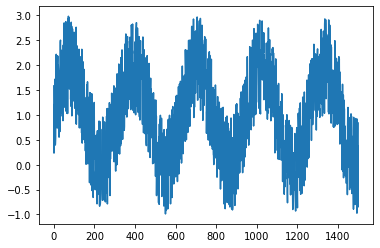

In [2]:
t = np.arange(0,1500)
x = np.sin(0.02*t)+ np.random.rand(1500) * 2
print(x)
#print(x.shape())
plt.plot(x)
plt.show()

Separating training data and tests

The first 1000 values are intended for training and the last 500 for testing.


In [3]:
train,test = x[0:1000], x[1000:]

# <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">Data preparation and input creation and label</div>

<div style="direction:rtl;text-align:right;font-family:Tahoma">
In RNN networks, we consider step input.
    For RNN networks, it is important that the input is in the form of a sequence of data. Here step determines the length of the input sequence. For example, if we have x as raw data:
<br>
</div>

    x = [1,2,3,4,5,6,7,8,9,10]
    
    for step=1, x input  and its y prediction becomes:
    
    x  y
    1  2
    2  3
    3  4
    4  5
    ..
    9  10
    
    for step=3, x and y contain:
    
    x         y
    1,2,3     4
    2,3,4     5
    3,4,5     6
    4,5,6     7
    ...
    7,8,9     10


In [4]:
step = 10

# convert into dataset data and label
def convertToDataset(data, step):
    #data = np.append(data,np.repeat(data[-1,],step))
    X, Y =[], []
    for i in range(len(data)-step):
        d=i+step  
        X.append(data[i:d,])
        Y.append(data[d,])
    return np.array(X), np.array(Y)

trainX,trainY =convertToDataset(train,step)
testX,testY =convertToDataset(test,step)

In [5]:
print(trainX.shape)
print(testX.shape)

(990, 10)
(490, 10)


# <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">Change data dimensions to input the network</div>

<div style="direction:rtl;text-align:right;font-family:Tahoma">
The input of an RNN network in Keras is as follows:
</div>

    (NumberOfSequences, TimeSteps, ElementsPerStep)

In [6]:
trainX = np.reshape(trainX, (trainX.shape[0],  trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0],testX.shape[1], 1))

In [7]:
print(trainX.shape)
print(testX.shape)

(990, 10, 1)
(490, 10, 1)


# <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">Network architecture and compile</div>


In [8]:
model = Sequential()
model.add(SimpleRNN(units=128, activation="tanh"))
model.add(Dense(1))



model.compile(loss='mean_squared_error', optimizer='rmsprop')

In [11]:
model.summary()
#n_samples x timesteps x n_features
#num_params = g × [h(h+i) + h]
#      g= gates in RNN (which is always 1 becauese we have one  (NN))
#      h= size of hiden units
#      i=dimension/size of input

# g=1
# h=128
# i=1(as we can see here no size is specified so we consider dimension)

#Calculations of PARAM

# paramter odsimple RNN

# Param # =g × [h(h+i) + h]
#          =1 * [128(128+1)+128]
#          = 1 * [128(129)+128]
#          = 1* [16512+128]
#          =1*16640
#          = 16640

# Param of Dense
#  =output shape of Simple RNN +output shape of dense
#  =128+1
#  =129


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 128)               16640     
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 16,769
Trainable params: 16,769
Non-trainable params: 0
_________________________________________________________________


<div style="direction:rtl;text-align:right;font-family:Tahoma">
In your opinion, we can call model.summary()
<br>
model.input
What brings back!</div>

# <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">Model Training</div>


In [10]:
history = model.fit(trainX,trainY, epochs=100, batch_size=16, verbose=1)

Epoch 1/100
62/62 [==============================] - 0s 2ms/step - loss: 0.5333
Epoch 2/100
62/62 [==============================] - 0s 2ms/step - loss: 0.4353
Epoch 3/100
62/62 [==============================] - 0s 2ms/step - loss: 0.4374
Epoch 4/100
62/62 [==============================] - 0s 2ms/step - loss: 0.4286
Epoch 5/100
62/62 [==============================] - 0s 2ms/step - loss: 0.4173
Epoch 6/100
62/62 [==============================] - 0s 2ms/step - loss: 0.4204
Epoch 7/100
62/62 [==============================] - 0s 2ms/step - loss: 0.4159
Epoch 8/100
62/62 [==============================] - 0s 2ms/step - loss: 0.4226
Epoch 9/100
62/62 [==============================] - 0s 2ms/step - loss: 0.4081
Epoch 10/100
62/62 [==============================] - 0s 2ms/step - loss: 0.4158
Epoch 11/100
62/62 [==============================] - 0s 2ms/step - loss: 0.4077
Epoch 12/100
62/62 [==============================] - 0s 2ms/step - loss: 0.4078
Epoch 13/100
62/62 [=================

In [31]:
model.summary()
#params = 4 * ((size_of_input + 1) * size_of_output + size_of_output^2)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_3 (SimpleRNN)     (None, 128)               16640     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 129       
Total params: 16,769
Trainable params: 16,769
Non-trainable params: 0
_________________________________________________________________


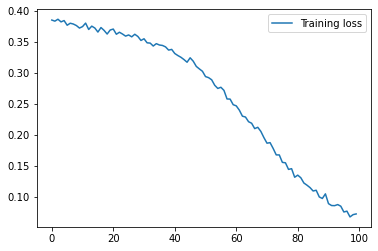

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline

loss = history.history['loss']
plt.plot(loss, label='Training loss')
plt.legend()

plt.show()

# <div style="direction:rtl;text-right;font-family:B Lotus, B Nazanin, Tahoma"> Model Evaluation</div>

In [33]:
trainScore = model.evaluate(trainX, trainY, verbose=0)
print(trainScore)

0.05988684296607971


# <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma"> Draw the original series and forecast for training and test data</div>


In [34]:
trainPredict = model.predict(trainX)
testPredict= model.predict(testX)
predicted=np.concatenate((trainPredict,testPredict),axis=0)

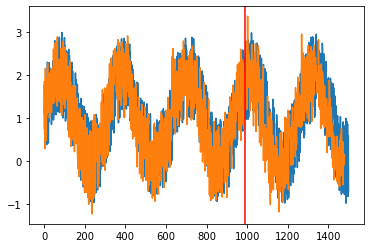

In [35]:
plt.plot(x)
plt.plot(predicted)
plt.axvline(len(trainX), c="r")
plt.show()

# <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma"> Model input with different length</div>


In [15]:
testX,testY =convertToDataset(test,50)

In [16]:
testX = np.reshape(testX, (testX.shape[0],testX.shape[1], 1))
testX.shape

(450, 50, 1)

<div style="direction:rtl;text-align:right;font-family:Tahoma">
As it turns out, the code encounters an error! why? </div>


In [17]:
testPredict= model.predict(testX)
testPredict

array([[ 1.59345686e+00],
       [ 1.87615883e+00],
       [ 1.42982900e+00],
       [ 2.18025541e+00],
       [ 1.32982743e+00],
       [ 2.07924366e+00],
       [ 1.24850047e+00],
       [ 1.31335342e+00],
       [ 1.93046546e+00],
       [ 1.70853102e+00],
       [ 1.77838027e+00],
       [ 1.98262334e+00],
       [ 2.14978790e+00],
       [ 1.52667165e+00],
       [ 9.22206759e-01],
       [ 8.07091177e-01],
       [ 1.26055384e+00],
       [ 9.62559104e-01],
       [ 8.53147328e-01],
       [ 1.38777137e+00],
       [ 1.61069000e+00],
       [ 9.87853169e-01],
       [ 1.85663509e+00],
       [ 1.23573232e+00],
       [ 2.11573601e+00],
       [ 1.54707897e+00],
       [ 1.11129808e+00],
       [ 1.33127844e+00],
       [ 1.85424578e+00],
       [ 1.29578865e+00],
       [ 1.72893107e+00],
       [ 2.21964145e+00],
       [ 1.97153318e+00],
       [ 1.24290693e+00],
       [ 1.79101884e+00],
       [ 2.23881102e+00],
       [ 1.60116875e+00],
       [ 1.57000268e+00],
       [ 1.1

In [18]:
model.input

<tf.Tensor 'simple_rnn_input_1:0' shape=(None, None, 1) dtype=float32>